In [1]:
#%matplotlib notebook
import scipy.misc
import scipy.spatial
import numpy as np
import matplotlib.pyplot as plt

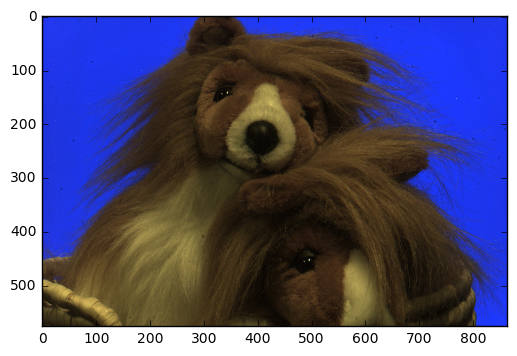

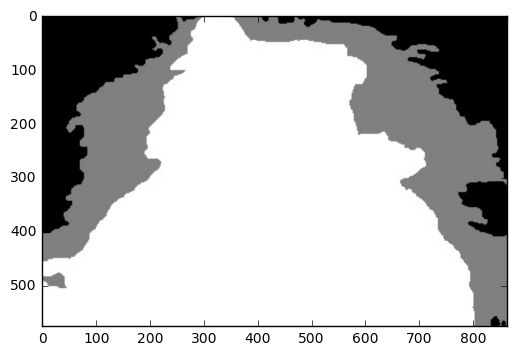

In [2]:
img  = scipy.misc.imread('toy.jpg')
trimap = scipy.misc.imread('toyTrimap.png', flatten='True')
h,w,c = img.shape
plt.imshow(img)
plt.show()
plt.imshow(trimap, cmap = 'gray')
plt.show()

In [3]:
bg = trimap == 0
fg = trimap == 255
unknown = True ^ np.logical_or(fg,bg)

In [4]:
fg_px = img[fg]
bg_px = img[bg]

In [5]:
unknown_px = img[unknown]

In [6]:
fg_hull = scipy.spatial.ConvexHull(fg_px)
fg_vertices_px = fg_px[fg_hull.vertices]

bg_hull = scipy.spatial.ConvexHull(bg_px)
bg_vertices_px = bg_px[bg_hull.vertices]

In [20]:
def convex_hull_distance(cvx_hull, pixels):
    d_hull = np.ones(pixels.shape[0]*cvx_hull.equations.shape[0]).reshape(pixels.shape[0],cvx_hull.equations.shape[0])*1000
    for j, surface_eq in enumerate(cvx_hull.equations):
        for i, px_val in enumerate(pixels):
            nhat= surface_eq[:3]
            d_hull[i,j] = np.dot(nhat, px_val) + surface_eq[3]
    return  np.maximum(np.amax(d_hull, axis=1),0)

In [22]:
d_fg = convex_hull_distance(fg_hull, unknown_px)
d_bg = convex_hull_distance(bg_hull, unknown_px)

In [9]:
d_bg1 = np.maximum(np.amax(d_bg,axis=1),0)
d_fg1 = np.maximum(np.amax(d_fg,axis=1),0)

In [23]:
alpha = d_bg/(d_bg+d_fg)

In [24]:
unknown = unknown.astype(float).copy()
unknown[unknown !=0] = alpha
plt.imshow(unknown+fg, cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


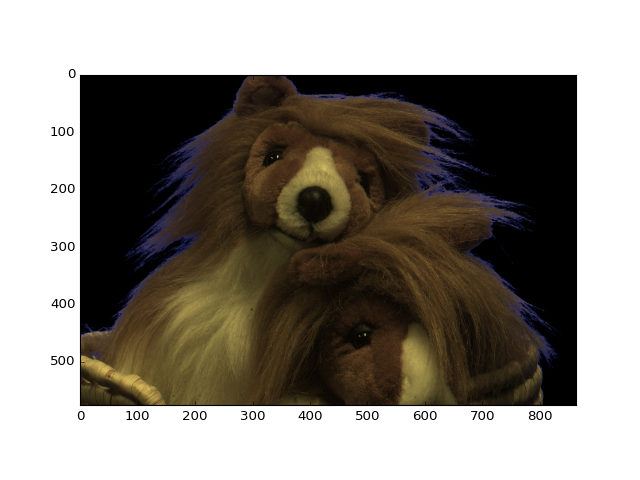

In [26]:
plt.imshow(((unknown2+fg).reshape(h,w,1).repeat(3,2)*img).astype(np.uint8))
plt.show()

<IPython.core.display.Javascript object>


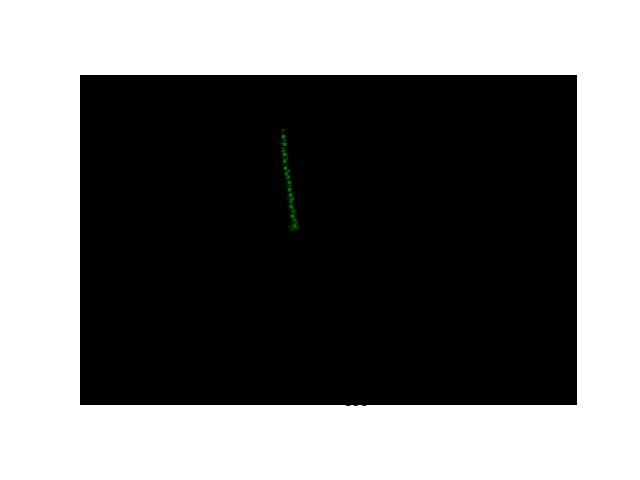

In [13]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
rng= (0,2000)
ax.scatter(fg_px[rng[0]:rng[1],0],fg_px[rng[0]:rng[1],1],fg_px[rng[0]:rng[1],2], c='blue')
ax.scatter(bg_px[rng[0]:rng[1],0],bg_px[rng[0]:rng[1],1],bg_px[rng[0]:rng[1],2], c='red')
ax.scatter(unknown_px[rng[0]:rng[1],0],unknown_px[rng[0]:rng[1],1],unknown_px[rng[0]:rng[1],2], c='green')

plt.show()



In [14]:
scipy.misc.imsave('alpha.png', unknown2+fg)